# Test plots for level 3 curtain files

If ```curtains_latz.py``` runs succesfully and procudes the correct data files, the output from this notebook should be as in the pdf version (also within this directory).

This notebook plots curtains (filled contours) with standard deviation (line contours) for specific humidity and isotope ratios.

In [52]:
import numpy as np
import xarray as xr
import netCDF4 as nc # 1.3.1
import matplotlib.pyplot as plt

%matplotlib inline

### Load and print data

In [56]:
curtains2016 = xr.load_dataset("wisper_oracles_curtains_2016.nc")
print(curtains2016)

<xarray.Dataset>
Dimensions:   (alt: 71, lat: 126)
Coordinates:
  * lat       (lat) float64 -24.0 -23.8 -23.6 -23.4 -23.2 ... 0.4 0.6 0.8 1.0
  * alt       (alt) int32 0 100 200 300 400 500 ... 6600 6700 6800 6900 7000
Data variables:
    q         (alt, lat) float64 6.91 6.91 6.91 6.9 6.9 ... nan nan nan nan nan
    dD        (alt, lat) float64 -74.08 -74.09 -74.1 -74.1 ... nan nan nan nan
    d18O      (alt, lat) float64 -11.65 -11.64 -11.64 -11.64 ... nan nan nan nan
    dxs       (alt, lat) float64 18.24 18.21 18.19 18.16 ... nan nan nan nan
    sig_q     (alt, lat) float64 1.97 1.97 1.97 1.97 1.97 ... nan nan nan nan
    sig_dD    (alt, lat) float64 32.23 32.21 32.19 32.16 ... nan nan nan nan
    sig_d18O  (alt, lat) float64 3.26 3.27 3.27 3.27 3.28 ... nan nan nan nan
    sig_dxs   (alt, lat) float64 21.36 21.39 21.42 21.45 ... nan nan nan nan
    n_obs     (alt, lat) float64 0.01 0.02 0.03 0.04 0.06 ... nan nan nan nan
Attributes:
    title:          Water and isotope ratio obse

In [70]:
curtains2017 = xr.load_dataset("wisper_oracles_curtains_2017.nc")
print(curtains2017)

<xarray.Dataset>
Dimensions:   (alt: 71, lat: 126)
Coordinates:
  * lat       (lat) float64 -24.0 -23.8 -23.6 -23.4 -23.2 ... 0.4 0.6 0.8 1.0
  * alt       (alt) int32 0 100 200 300 400 500 ... 6600 6700 6800 6900 7000
Data variables:
    q         (alt, lat) float64 nan nan nan nan nan ... 1.76 1.8 1.84 1.87 1.9
    dD        (alt, lat) float64 nan nan nan nan ... -302.5 -302.6 -302.8 -302.9
    d18O      (alt, lat) float64 nan nan nan nan ... -40.31 -40.35 -40.38 -40.4
    dxs       (alt, lat) float64 nan nan nan nan nan ... 19.09 19.17 19.28 19.42
    sig_q     (alt, lat) float64 nan nan nan nan nan ... 0.59 0.56 0.53 0.51
    sig_dD    (alt, lat) float64 nan nan nan nan nan ... 13.25 12.57 12.09 11.74
    sig_d18O  (alt, lat) float64 nan nan nan nan nan ... 1.74 1.64 1.57 1.51
    sig_dxs   (alt, lat) float64 nan nan nan nan nan ... 9.08 8.84 8.64 8.46
    n_obs     (alt, lat) float64 nan nan nan nan nan ... 0.01 0.01 0.01 0.0 0.0
Attributes:
    title:          Water and isotope r

In [71]:
curtains2018 = xr.load_dataset("wisper_oracles_curtains_2018.nc")
print(curtains2018)

<xarray.Dataset>
Dimensions:   (alt: 71, lat: 126)
Coordinates:
  * lat       (lat) float64 -24.0 -23.8 -23.6 -23.4 -23.2 ... 0.4 0.6 0.8 1.0
  * alt       (alt) int32 0 100 200 300 400 500 ... 6600 6700 6800 6900 7000
Data variables:
    q         (alt, lat) float64 nan nan nan nan nan ... 2.03 2.05 2.07 2.08 2.1
    dD        (alt, lat) float64 nan nan nan nan ... -282.5 -283.3 -283.9 -284.4
    d18O      (alt, lat) float64 nan nan nan nan ... -37.76 -37.85 -37.92 -37.97
    dxs       (alt, lat) float64 nan nan nan nan nan ... 20.53 20.35 20.2 20.08
    sig_q     (alt, lat) float64 nan nan nan nan nan ... 0.75 0.74 0.73 0.72
    sig_dD    (alt, lat) float64 nan nan nan nan nan ... 38.59 37.69 36.91 36.27
    sig_d18O  (alt, lat) float64 nan nan nan nan nan ... 5.26 5.12 5.0 4.89 4.81
    sig_dxs   (alt, lat) float64 nan nan nan nan nan ... 6.18 6.3 6.39 6.44 6.47
    n_obs     (alt, lat) float64 nan nan nan nan nan ... 0.02 0.01 0.01 0.0 0.0
Attributes:
    title:          Water and 

### First, create some functions and dictionaries

Contour levels and color mapping for mean curtain values

In [57]:
from matplotlib.colors import LinearSegmentedColormap as linsegcmap

def get_clevels_cmapping():
    """
    Returns contour levels and colormappings to use for the H2O, dD, and d18O 
    curtain plots.
    """
    
    ## H2O contour levels
    levs_h2o = np.arange(0,17,1.)
    
    ## Iso ratio contour levels:
    dD_min = -350; dD_max = -64 # dD_min=-260
    d18O_min = -45; d18O_max = -10.5 # d18O_min=-32
        
    a_dD = 1 # Desired spacing in permil of between the first 2 contours.
    n = np.log2((dD_max-dD_min)/a_dD) # Power of 2 that spans the range (dD_max-dD_min)/a_dD.
    levspacing_dD = a_dD*(2**np.linspace(1,n,15))
    levs_dD = np.flip(np.append([dD_max], dD_max-levspacing_dD))
    levs_dD = np.round(levs_dD)
    
    a_d18O = 0.1
    n = np.log2((d18O_max-d18O_min)/a_d18O)
    levspacing_d18O = a_d18O*(2**np.linspace(1,n,15))
    levs_d18O = np.flip(np.append([d18O_max], d18O_max-levspacing_d18O))
    levs_d18O = np.round(levs_d18O, decimals=1)
    
    levs_dxs = np.arange(-7,27,2)
        
    ## Color mapping:
        # H2O is straightforward:
    cmap_name = 'gist_ncar' 
    cmap_h2o = plt.get_cmap(cmap_name)
  
        # Iso ratios are less straightforward:
    def cmapping_to_even(levs, cmap_name):
        """
        Map uneven level spacings to even colormap spacings.
        levs: contour levels (array) in increasing order.
        cmap (str): matplotlib colormap to use.
        """
        cmap = plt.get_cmap(cmap_name)
        normedlevs = (levs-levs[0])/(levs[-1]-levs[0]) # Norm to 0-1 scale.
        colors = cmap(np.linspace(0,1,len(levs))) # Cmap colors at even spacings.
        # Map:
        return linsegcmap.from_list(cmap_name, list(zip(normedlevs,colors)))
    
    cmap_dD = cmapping_to_even(levs_dD, cmap_name)
    cmap_d18O = cmapping_to_even(levs_d18O, cmap_name)
        
    
    return dict(q=(levs_h2o,cmap_h2o), dD=(levs_dD, cmap_dD), 
                d18O=(levs_d18O, cmap_d18O), 
                dxs=(levs_dxs, cmap_h2o))

clevs = get_clevels_cmapping()

Contour levels for standard deviations

In [73]:
# Standard deviation contours:
clevs_std_2016 = dict(q=[1, 2, 3], dD=[10, 40, 70, 100], dxs=[5, 10, 15, 20])
clevs_std_20172018 = dict(q=[1, 2, 3], dD=[5, 20, 35, 50], dxs=[2, 6, 10, 14])

Function to plot curtains with standard deviations

In [74]:
def plotcurtain(data, varkey, clevs, clevs_std, fig, ax):
    """
    """
    # Filled contours for curtains (mean values):
    csf = ax.contourf(
        data['lat'], data['alt'], data[varkey], 
        levels=clevs[varkey][0], cmap=clevs[varkey][1]
        )
    fig.colorbar(csf, orientation='vertical', ax=ax)
    
    # Black lines for standard deviations:
    cs_sig = ax.contour(
        data['lat'], data['alt'], data['sig_'+varkey], 
        colors='black', levels=clevs_std[varkey]
        )
    ax.clabel(cs_sig, cs_sig.levels, inline=True, fmt='%i', fontsize=12)

### 2016 results

Text(0, 0.5, 'Altitude, meters')

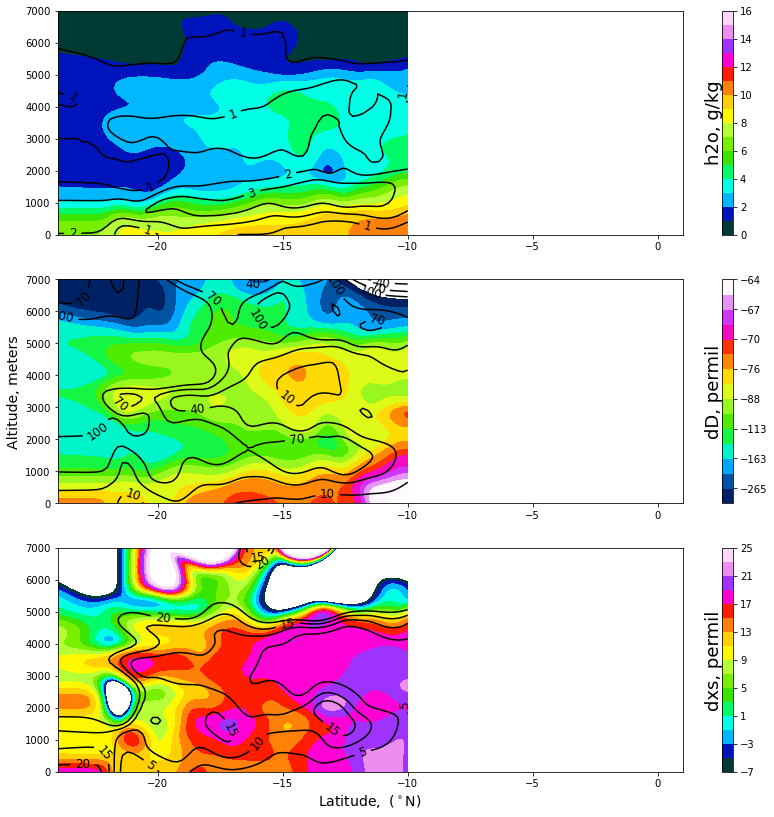

In [80]:
fig2016, axes2016 = plt.subplots(3, 1, figsize=(14,14))

varkeys = ['q', 'dD', 'dxs']
pltlabel_keys = dict(q='h2o, g/kg', dD='dD, permil', dxs='dxs, permil')
for k, ax in zip(varkeys, axes2016):
    plotcurtain(curtains2016, k, clevs, clevs_std_2016, fig2016, ax)
    ax.text(
        1.05, 0.5, pltlabel_keys[k], ha='center', va='center', 
        rotation=90, fontsize=18, transform=ax.transAxes
        )
    
axes2016[2].set_xlabel(r'Latitude,  ($^\circ$N)', fontsize=14)
axes2016[1].set_ylabel('Altitude, meters', fontsize=14)

### 2017 Results

Text(0, 0.5, 'Altitude, meters')

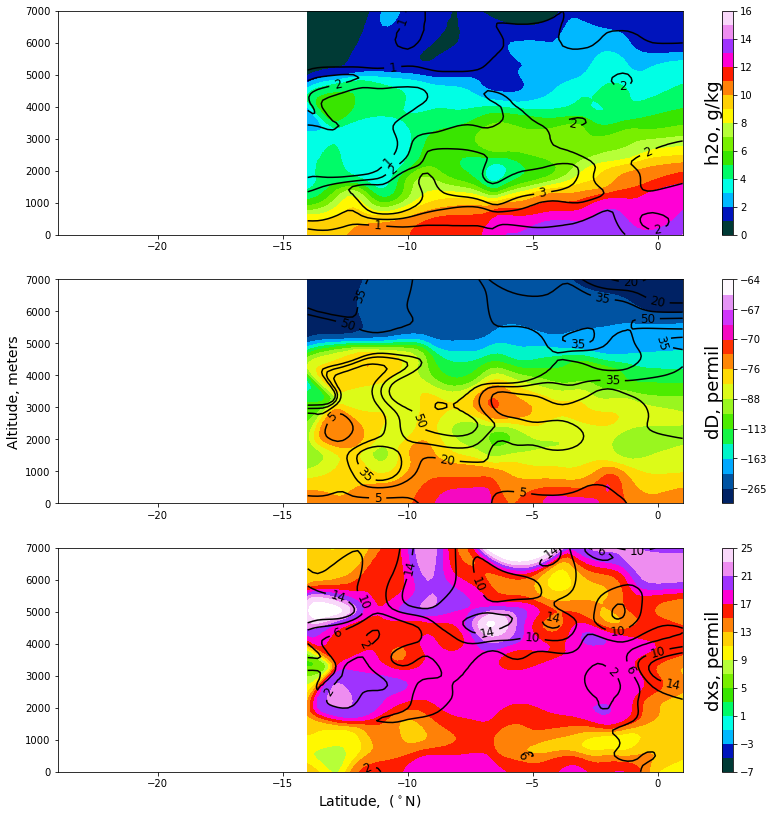

In [83]:
fig2017, axes2017 = plt.subplots(3, 1, figsize=(14,14))

varkeys = ['q', 'dD', 'dxs']
pltlabel_keys = dict(q='h2o, g/kg', dD='dD, permil', dxs='dxs, permil')
for k, ax in zip(varkeys, axes2017):
    plotcurtain(curtains2017, k, clevs, clevs_std_20172018, fig2017, ax)
    ax.text(
        1.05, 0.5, pltlabel_keys[k], ha='center', va='center', 
        rotation=90, fontsize=18, transform=ax.transAxes
        )
    
axes2017[2].set_xlabel(r'Latitude,  ($^\circ$N)', fontsize=14)
axes2017[1].set_ylabel('Altitude, meters', fontsize=14)

### 2018 Results

Text(0, 0.5, 'Altitude, meters')

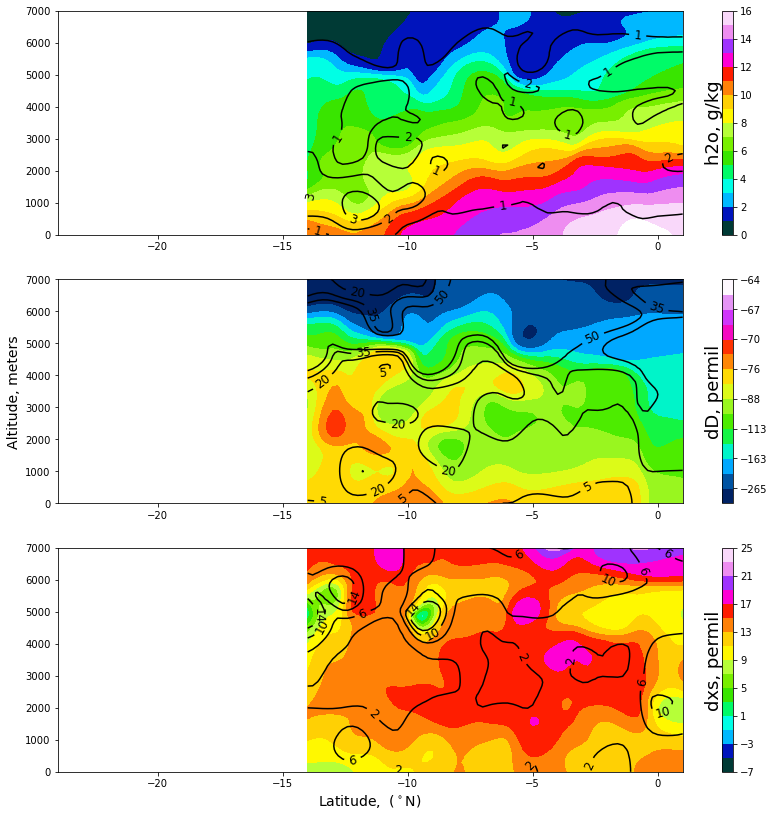

In [84]:
fig2018, axes2018 = plt.subplots(3, 1, figsize=(14,14))

varkeys = ['q', 'dD', 'dxs']
pltlabel_keys = dict(q='h2o, g/kg', dD='dD, permil', dxs='dxs, permil')
for k, ax in zip(varkeys, axes2018):
    plotcurtain(curtains2018, k, clevs, clevs_std_20172018, fig2017, ax)
    ax.text(
        1.05, 0.5, pltlabel_keys[k], ha='center', va='center', 
        rotation=90, fontsize=18, transform=ax.transAxes
        )
    
axes2018[2].set_xlabel(r'Latitude,  ($^\circ$N)', fontsize=14)
axes2018[1].set_ylabel('Altitude, meters', fontsize=14)